# 1D rezgések egyenletének megoldása

In [1]:
# szokásos bevezetés
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Egyszerű mozgásegyenlet-megoldó

In [2]:
# egyszerű, józan eszes léptetés: x és v értékek korrekciója
# feltéve, hogy állandó erő hat dt ideig
# örökölve a régi rutinokat

def lepes(xn, vn, m, F, dt):
    a = F(xn,vn,m) / m  # gyorsulás Newton II-ből
    v_new = vn + a*dt   # konstanssal közelítjük a gyorsulást
    x_new = xn + v_new*dt  # feltesszük, hogy az új sebességgel mozgott. lehetne máshogy?
    
    return(x_new, v_new) # visszaadjuk az új értékekeket

# Newton szerint így működik a természet, csak dt=0-val számol...

In [3]:
# Rezgést leíró erőfgv-ek

# globális paraméterek beállítása a függvényeken kívül. Nem szép megoldás, ....


# 1D rugó
D=50.0   # rugóállandó
def F_rugo(r,v,m):
    return(-D*r)

# inga 
l = 1.2 
g = 9.81
def F_inga(r,v,m):
    
    # gravitációs erő:
    F_erinto=-m*g*np.sin(r/l)
    
    return(F_erinto)

## Harmonikus rezgőmozgás

Text(0, 0.5, 'v_x(t)')

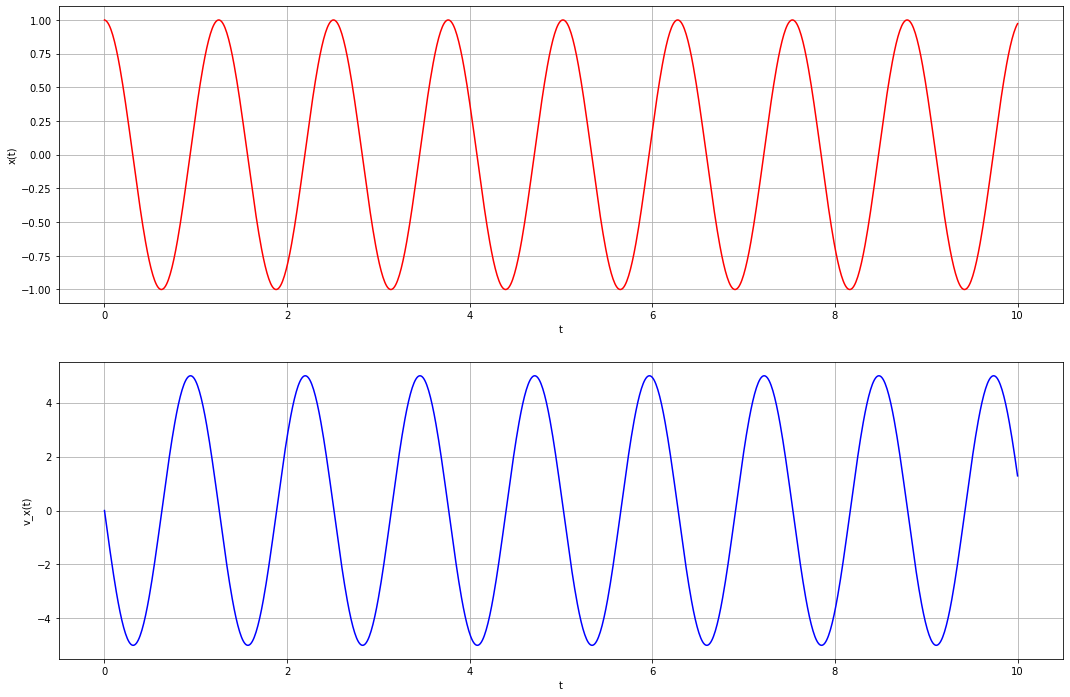

In [4]:
# kezdőértékek
x0=1.0   # r helyett x, mert csak 1 koordináta van
v0=0.0
dt=0.01
m=2.0

x=x0; v=v0
t=0.0; t_max=10.0


# változók inicializálása
t_list=[]  # listákba pakoljuk az eredményt
x_list=[]
v_list=[]

# tényleges futtatás
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    x, v = lepes(x, v, m, F_rugo, dt)
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr, color="red") # az elsőbe az rx(t)
ax2.plot(t_list, v_arr, color="blue") # a másodikba a vx(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

In [5]:
# Egy kis statisztika:
x_min = x_arr.min()
x_max = x_arr.max()
v_min = v_arr.min()
v_max = v_arr.max()
print("x tartomány: %0.2f -- %0.2f"%(x_min, x_max))
print("v tartomány: %0.2f -- %0.2f"%(v_min, v_max))

x tartomány: -1.00 -- 1.00
v tartomány: -5.00 -- 5.00


In [6]:
# periódusidő
# x helyi maximumainak kiválasztása
x_loc_max=np.zeros(x_arr.shape, dtype=bool)  # x_arr-ral egy méretű bool (logikai) tömb foglalása

# legyen az érték nagyobb, mint az előtte és a utána levő is:
x_loc_max[1:-1] = (x_arr[1:-1]>x_arr[0:-2])  & (x_arr[1:-1] > x_arr[2:])
# x_loc_max: ott True, ahol helyi maximum van

# maximumok időpontjai
t_loc_max=t_arr[x_loc_max]

print("Maximumhelyek:", t_loc_max)
# első két max különbsége:
print("Első két maximum különbsége: %7.5f"%(t_loc_max[1]-t_loc_max[0]))
# pontosabb periódusidő:
T=(t_loc_max[-1]-t_loc_max[0])/(len(t_loc_max)-1)
print("Pontosabb periódusidő: %7.5f" % T)

# elméleti periódusidő harmonikus rezgésre:
print("Elvi harmonius rezgés periódusidő: %7.5f"%(2*np.pi*(m/D)**0.5))

Maximumhelyek: [1.25 2.51 3.76 5.02 6.28 7.53 8.79]
Első két maximum különbsége: 1.26000
Pontosabb periódusidő: 1.25667
Elvi harmonius rezgés periódusidő: 1.25664


## Hogyan változott az energia?

### Mozgási energiát könnyű számolni

In [7]:
E_m_arr=0.5*m*(v_arr**2)

Text(0, 0.5, 'E_m')

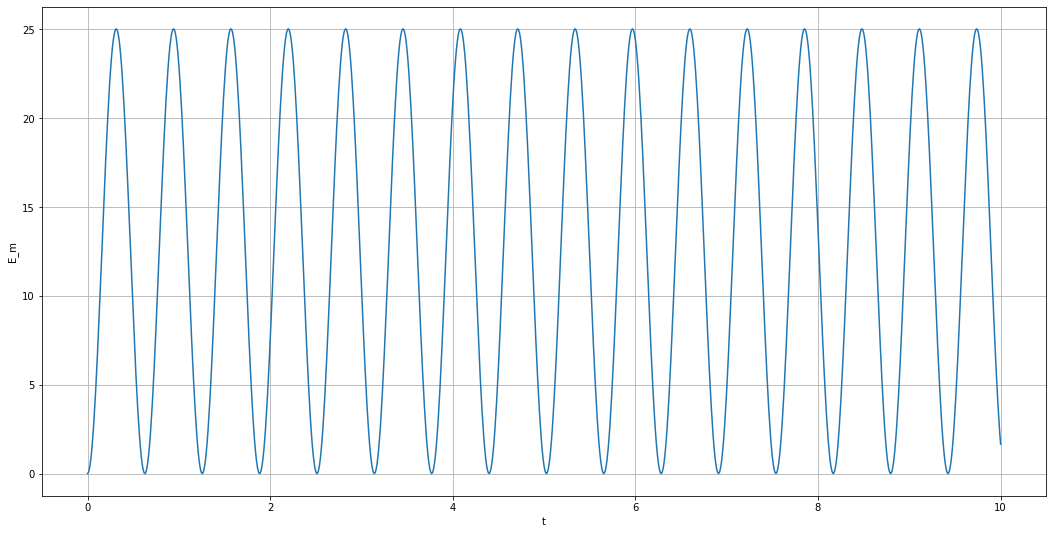

In [8]:
fig=plt.figure(figsize=(18,9))  
ax1=fig.add_subplot(111) # egyetlen grafikon
ax1.plot(t_list, E_m_arr) # 
ax1.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("E_m")

### Potenciális energiához kell egy függvény

In [9]:
V_arr=0.5*D*x_arr**2

Text(0, 0.5, 'E')

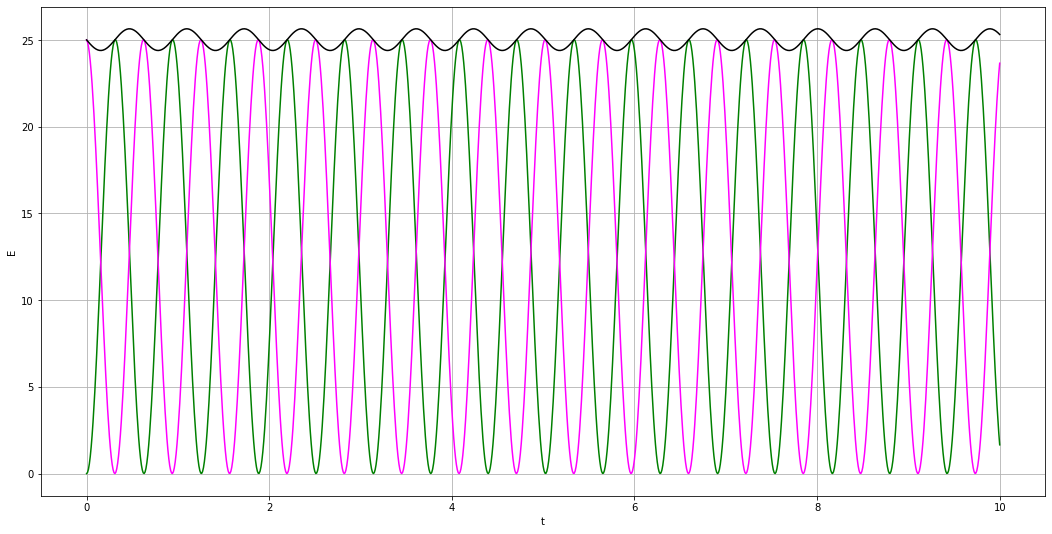

In [10]:
fig=plt.figure(figsize=(18,9))  
ax1=fig.add_subplot(111) # egyetlen grafikon 
ax1.plot(t_list, E_m_arr, color="green") # mozgási energia
ax1.plot(t_list, V_arr, color="magenta") # helyzeti energia
ax1.plot(t_list, E_m_arr+V_arr, color="black") # össz energia
ax1.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("E")

In [11]:
# Miért nem pontosan konstans E_össz?

## Nem harmonikus rezgőmozgás

Text(0, 0.5, 'v_x(t)')

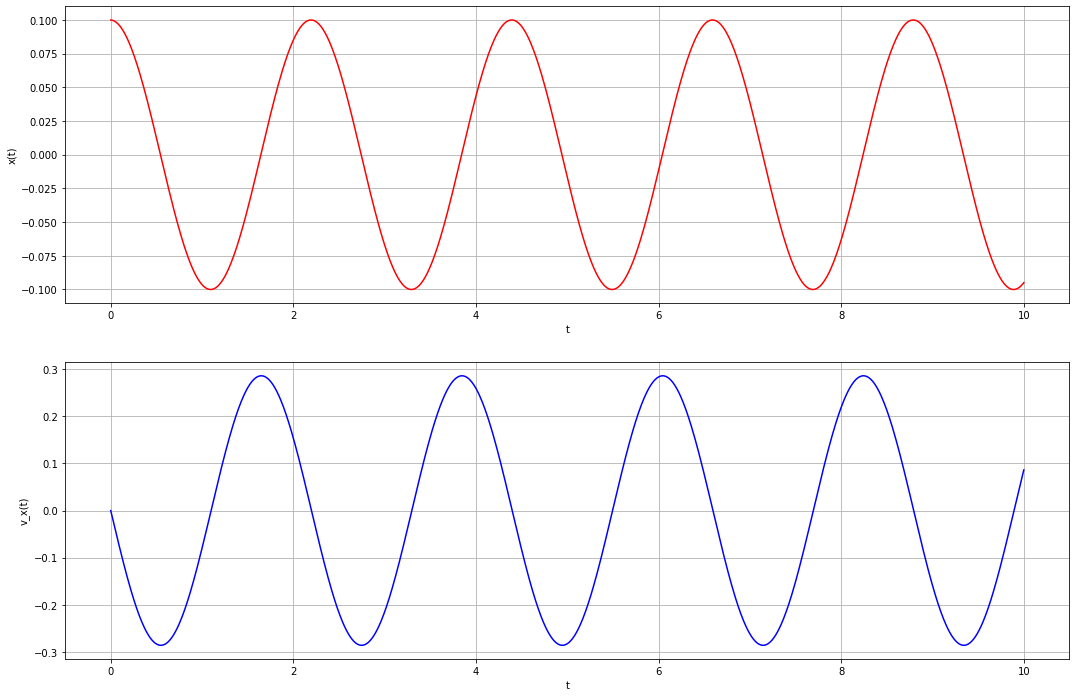

In [12]:
x0=0.1
v0=0.0
dt=0.01
m=2.0

x=x0; v=v0
t=0.0; t_max=10.0

t_list=[]  
x_list=[]
v_list=[]

# tényleges számítás
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    x, v = lepes(x, v, m, F_inga, dt)
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr, color="red") # az elsőbe az rx(t)
ax2.plot(t_list, v_arr, color="blue") # a másodikba a vx(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

In [13]:
# periódusidő
# x helyi maximumainak kiválasztása
x_loc_max=np.zeros(x_arr.shape, dtype=bool)  # x_arr-ral egy méretű tömb foglalása

# legyen az érték nagyobb, mint az előtte és a utána levő is:
x_loc_max[1:-1] = (x_arr[1:-1]>x_arr[0:-2])  & (x_arr[1:-1] > x_arr[2:])
# x_loc_max: ott True, ahol helyi maximum van

# maximumok időpontjai
t_loc_max=t_arr[x_loc_max]
# első két max különbsége:
print("Első két maximum különbsége: %7.5f"%(t_loc_max[1]-t_loc_max[0]))
# pontosabb periódusidő:
T=(t_loc_max[-1]-t_loc_max[0])/(len(t_loc_max)-1)
print("Pontosabb periódusidő: %7.5f" % T)

Első két maximum különbsége: 2.20000
Pontosabb periódusidő: 2.20000


## Csillapodó rezgőmozgás

In [61]:
# 1D rugó, lineáris közegellenállás
C_lin = 1.0   #   F_közeg= -C_lin*v
def F_rugo_kozeg_lin(r,v,m):
    F=F_rugo(r,v,m) - C_lin*v
    return F


# 1D rugó, négyzetes közegellenállás
C_negyz=0.47
A = 0.5
rho = 1.2
def F_rugo_kozeg_negyz(r,v,m):
    F=F_rugo(r,v,m) - 0.5*C_negyz*A*rho*v*np.abs(v)
    return F


# 1D rugó, súrlódásos fékeződés
mu  = 0.2
g = 9.81
def F_rugo_surl(r,v,m):
    if np.abs(v)<1e-10:
        F=F_rugo(r,v,m) 
    else:
        F=F_rugo(r,v,m) - mu*m*g*v/(np.abs(v))
    return F


Text(0, 0.5, 'v_x(t)')

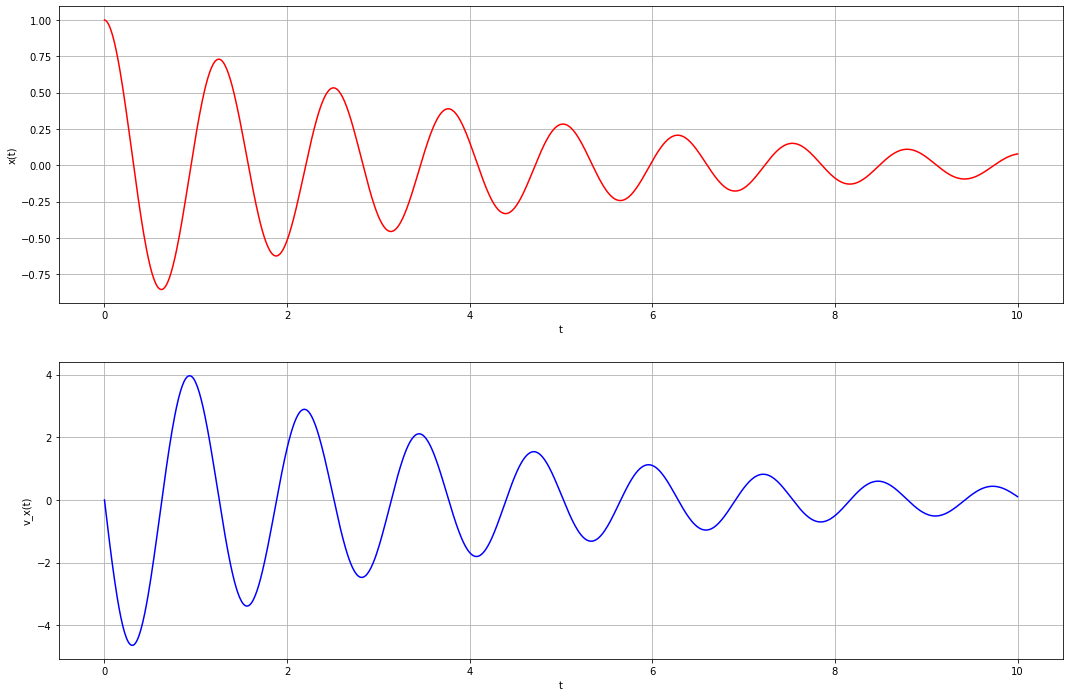

In [63]:
x0=1.0
v0=0.0
dt=0.01
m=2.0

F_függvény=F_rugo_kozeg_lin # lecserélhető a fentiek egyikére!

x=x0; v=v0
t=0.0; t_max=10.0

t_list=[]  # listákba pakoljuk az eredményt
x_list=[]
v_list=[]
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    x, v = lepes(x, v, m, F_függvény, dt)  
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr, color="red") # az elsőbe az rx(t)
ax2.plot(t_list, v_arr, color="blue") # a másodikba a vx(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

In [16]:
# periódusidő
# x helyi maximumainak kiválasztása
x_loc_max=np.zeros(x_arr.shape, dtype=bool)  # x_arr-ral egy méretű tömb foglalása
x_loc_max[1:-1] = (x_arr[1:-1]>x_arr[0:-2])  & (x_arr[1:-1] > x_arr[2:])
t_loc_max=t_arr[x_loc_max]
x_max_arr=x_arr[x_loc_max]
T=(t_loc_max[-1]-t_loc_max[0])/(len(t_loc_max)-1)
print("Periódusidő: %7.5f" % T)
print("Amplitúdók csökkenése:")
for i in range(len(t_loc_max)):
    print("%7.5f\t%7.5f" % ( t_loc_max[i], x_max_arr[i])  )

Periódusidő: 1.25667
Amplitúdók csökkenése:
1.25000	0.73006
2.51000	0.53282
3.76000	0.38880
5.02000	0.28384
6.28000	0.20714
7.53000	0.15117
8.79000	0.11035


In [17]:
# szomszédos amplitúdók aránya:
print(x_max_arr[1:]/x_max_arr[:-1])

[0.72983562 0.72969977 0.73002848 0.72980524 0.72975643 0.72999804]


## Gerjeszett rezgések

In [18]:
# 1D rugó, lineáris közegellenállás
C_lin = 1.0   #   F_közeg= -C_lin*v
def F_rugo_kozeg_lin(r,v,m):
    F=F_rugo(r,v,m) - C_lin*v

    return F

In [19]:
# Külső gerjesztő erő:
omega_g=15.0
F_0=50.0  
def F_gerj(t):
    return F_0*np.sin(omega_g*t)



# kicsit más léptető kell: külső extra erő is kell, ami nem a test helyzetétől függ
def lepes_k(xn, vn, m, F, F_k, dt):
    a = (F(xn,vn,m)+F_k) / m  # gyorsulás Newton II-ből
    v_new = vn + a*dt   # konstanssal közelítjük a gyorsulást
    x_new = xn + v_new*dt  # feltesszük, hogy az új sebességgel mozgott. lehetne máshogy?
    
    return(x_new, v_new) # visszaadjuk az új értékekeket

Text(0, 0.5, 'v_x(t)')

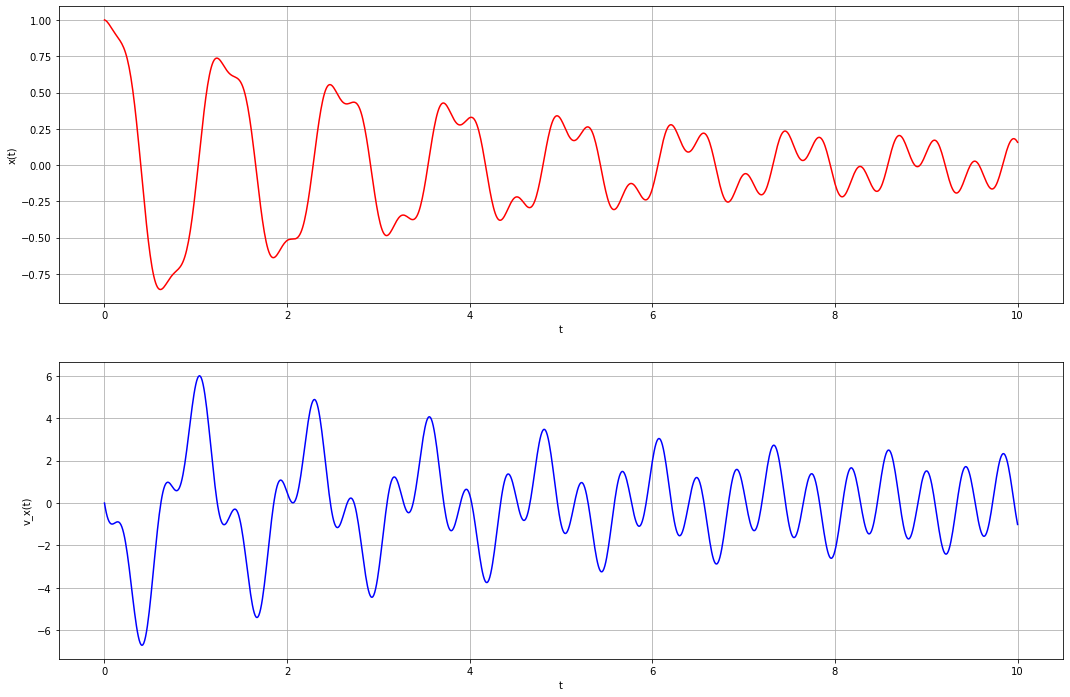

In [20]:
x0=1.0
v0=0.0
dt=0.01
m=2.0

F_függvény=F_rugo_kozeg_lin 

x=x0; v=v0
t=0.0; t_max=10.0


t_list=[]  # listákba pakoljuk az eredményt
x_list=[]
v_list=[]
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    F_k=F_gerj(t)
    x, v = lepes_k(x, v, m, F_függvény, F_k, dt)  
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr, color="red") # az elsőbe az rx(t)
ax2.plot(t_list, v_arr, color="blue") # a másodikba a vx(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

## Rezonancia

In [21]:
omega0=(D/m)**0.5
print("Saját körfrekvencia: %7.5f 1/s"%omega0)

Saját körfrekvencia: 5.00000 1/s


In [41]:
omega_g=5.9

Text(0, 0.5, 'v_x(t)')

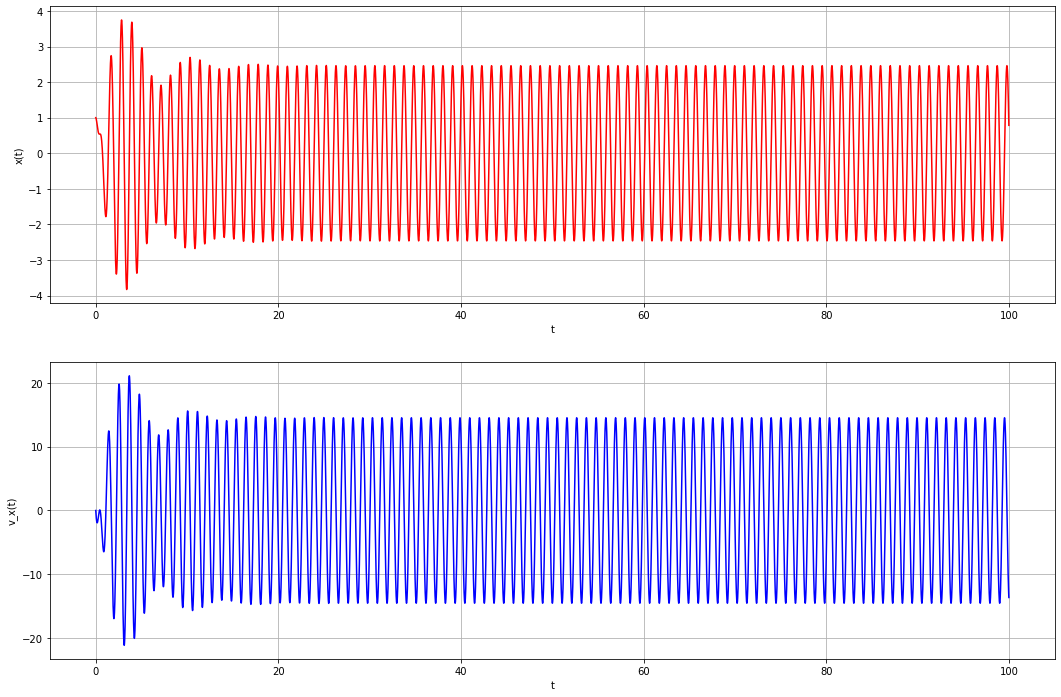

In [42]:
x0=1.0
v0=0.0
dt=0.01
m=2.0

F_függvény=F_rugo_kozeg_lin 

x=x0; v=v0
t=0.0; t_max=100.0


t_list=[]  # listákba pakoljuk az eredményt
x_list=[]
v_list=[]
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    F_k=F_gerj(t)
    x, v = lepes_k(x, v, m, F_függvény, F_k, dt)  
    t += dt
    
# tömbbé alakítjuk
x_arr=np.asarray(x_list)
v_arr=np.asarray(v_list)
t_arr=np.asarray(t_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, x_arr, color="red") # az elsőbe az rx(t)
ax2.plot(t_list, v_arr, color="blue") # a másodikba a vx(t)
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_x(t)")

In [24]:
# hosszú távon beálló amplitúdó keresése
x_loc_max=np.zeros(x_arr.shape, dtype=bool)  # x_arr-ral egy méretű tömb foglalása
x_loc_max[1:-1] = (x_arr[1:-1]>x_arr[0:-2])  & (x_arr[1:-1] > x_arr[2:])
t_loc_max=t_arr[x_loc_max]
x_max_arr=x_arr[x_loc_max]
A_g=x_max_arr[-1]


print("omega0=%7.5f;  omega_g=%7.5f;  A=%7.5f"%(omega0, omega_g, A_g))

omega0=5.00000;  omega_g=1.00000;  A=1.04133
